**Libraries**



In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

**MDP class**

In [2]:
# MDP class
# The class takes four parameters: transition_probs, rewards, initial_state, and terminal_states.

# transition_probs: dictionary that defines the probabilities of transitioning from one state to another given a certain action.
# rewards: dictionary that specifies the rewards received when transitioning from one state to another using a particular action.
# initial_state: starting state of the MDP.
# terminal_states: list of states that are considered terminal, meaning the process ends when these states are reached.

class MDP:
    def __init__(self, transition_probs, rewards, initial_state, terminal_states=None):
        self.transition_probs = transition_probs
        self.rewards = rewards
        self.initial_state = initial_state
        self.state = initial_state
        self.terminal_states = terminal_states if terminal_states else []

    def get_all_states(self):
        return list(self.transition_probs.keys())

    def get_possible_actions(self, state):
        return list(self.transition_probs[state].keys())

    def get_next_states(self, state, action):
        return self.transition_probs[state][action]

    def get_transition_prob(self, state, action, next_state):
        return self.transition_probs[state][action].get(next_state, 0) # Returns 0 if next_state is not found.

    def get_reward(self, state, action, next_state):
        return self.rewards.get(state, {}).get(action, {}).get(next_state, 0)

    def reset(self):
        self.state = self.initial_state
        return self.state

    def is_terminal(self, state):
        return state in self.terminal_states

    def get_next_state(self, state, action):
        next_states = self.transition_probs[state][action]
        next_state = max(next_states, key=next_states.get)
        return next_state

    def step(self, action):
        next_states_probs = self.transition_probs[self.state][action]
        next_states = list(next_states_probs.keys())
        probabilities = list(next_states_probs.values())
        next_state = np.random.choice(next_states, p=probabilities)
        reward = self.get_reward(self.state, action, next_state)
        self.state = next_state
        done = self.is_terminal(next_state)
        return next_state, reward, done

**Define the transition probabilities and rewards**

In [3]:
transition_probs = {
    's0': {
        'a0': {'s0': 0.6, 's1': 0.4},
        'a1': {'s1': 0.8, 's2': 0.2}
    },
    's1': {
        'a0': {'s0': 0.3, 's2': 0.7},
        'a1': {'s2': 1.0}
    },
    's2': {
        'a0': {'s1': 0.5, 's2': 0.5},
        'a1': {'s0': 0.3, 's2': 0.7}
    }
}

rewards = {
    's0': {
        'a0': {'s0': 0, 's1': 0},
        'a1': {'s1': 2, 's2': 0}
    },
    's1': {
        'a0': {'s0': 0, 's2': 3},
        'a1': {'s2': 0}
    },
    's2': {
        'a0': {'s1': 0, 's2': 0},
        'a1': {'s0': -2, 's2': 0}
    }
}

# YOUR CODE HERE
# YOUR CODE HERE

In [42]:
rewards['s0']['a1']['s1']

2

**Getting familiar with MDP class**

In [4]:
initial_state = 's0'
terminal_states = ['s2']

# Create the MDP instance
mdp = MDP(transition_probs, rewards, initial_state, terminal_states)

# Get all states
all_states = mdp.get_all_states()
print(f"All states: {all_states}")

# Get possible actions from state 's0'
possible_actions = mdp.get_possible_actions('s0')
print(f"Possible actions from 's0': {possible_actions}")

# Get next states for action 'a0' from state 's0'
next_states = mdp.get_next_states('s0', 'a0')
print(f"Next states for action 'a0' from state 's0': {next_states}")

# Get transition probability from 's0' to 's1' with action 'a0'
transition_prob = mdp.get_transition_prob('s0', 'a0', 's1')
print(f"Transition probability from 's0' to 's1' with action 'a0': {transition_prob}")

# Get the reward of transitioning from state to next state by taking action
reward = mdp.get_reward('s0', 'a0', 's1')
print(f"Reward from 's0' to 's1' with action 'a0': {reward}")

state,reward, done = mdp.step('a0')
print(f"Current state: {mdp.state}")

All states: ['s0', 's1', 's2']
Possible actions from 's0': ['a0', 'a1']
Next states for action 'a0' from state 's0': {'s0': 0.6, 's1': 0.4}
Transition probability from 's0' to 's1' with action 'a0': 0.4
Reward from 's0' to 's1' with action 'a0': 0
Current state: s1


# **Solving the MDP with Value Iteration algorithm**

In [5]:
def initialize_value_function(states):
    """
    Inputs:
      states: list of all states in the MDP.

    Returns:
      dict: dictionary with states as keys and 0 as initial values.
    """
    init_states = {}
    keys = mdp.get_all_states()
    values = np.zeros(len(keys))
    init_states = dict(zip(keys, values))
    return init_states


In [6]:
init_states = initialize_value_function(all_states)
print(init_states)
max(init_states.values())

{'s0': 0.0, 's1': 0.0, 's2': 0.0}


0.0

In [7]:
def update_value_function(mdp, value_function, discount_factor):
    """
    Inputs:
      mdp: your mdp instance.
      value_function: current value function.
      discount_factor: discount factor for future rewards.

    Returns:
      dict: updated value function.
    """
    new_value_function = value_function.copy()

    for state in mdp.get_all_states():
        if not mdp.is_terminal(state):
            max_value = float('-inf')
            for action in mdp.get_possible_actions(state):
                # initialize the expected value: YOUR CODE HERE
                expected_value = 0
                for next_state in mdp.get_next_states(state, action):  
                    #transition_prob = YOUR CODE HERE
                    transition_prob = mdp.get_transition_prob(state,action,next_state)
                    #reward = YOUR CODE HERE
                    reward = mdp.get_reward(state,action,next_state)
                    #expected_value = YOUR CODE HERE
                    expected_value += transition_prob*(reward+discount_factor*new_value_function[next_state])
                #max_value = YOUR CODE 

                max_value = max(expected_value,max_value)
            new_value_function[state] = max_value

    return new_value_function
initial_state=initialize_value_function(all_states)
update_value_function(mdp,initial_state,0.9)


{'s0': 1.6, 's1': 2.5319999999999996, 's2': 0.0}

In [8]:
mdp = MDP(transition_probs, rewards, initial_state)

In [17]:
def value_iteration(mdp, discount_factor, threshold):
    """
    Inputs:
      mdp: your mdp instance.
      discount_factor: discount factor for future rewards.
      threshold: threshold for convergence.

    Returns:
      dict: optimal value function.
      list: history of value functions over iterations.
    """
    # initialize the value function: YOUR CODE HERE
    value_function = initialize_value_function(mdp)
    # iterate until convergence
    # YOUR CODE HERE
    history = []
    difference = 1
    count = 0
    while difference> threshold:

      new_value_function = update_value_function(mdp,value_function,discount_factor)
      history.append(new_value_function)
      count+=1
      difference = abs(sum(new_value_function.values())-sum(value_function.values()))
      value_function = new_value_function
    return value_function, history

In [19]:
value_function,history=value_iteration(mdp,0.9,0.01)
print(len(history))
print(history[-1])

38
{'s0': 10.353911591169746, 's1': 10.09697976060065, 's2': 8.258943485830878}


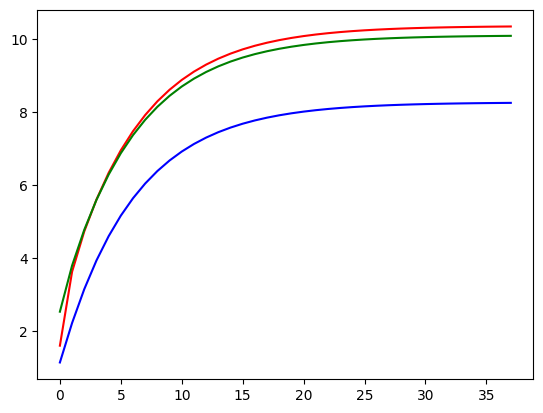

In [28]:
s0_list=[step['s0'] for step in history]
s1_list=[step['s1'] for step in history]
s2_list=[step['s2'] for step in history]
x = np.arange(0,len(s0_list))
plt.plot(x,s0_list,'r')
plt.plot(x,s1_list,'g')
plt.plot(x,s2_list,'b')

**Question 1**

The discount factor is used to increase the weight of immediate rewards and penalize rewards obtained after a long time.
Its values are between 0 and 1

**Question 2**

The stopping criterion is used to stop the MDP after it reaches convergence. It is still required in practice even if the MDP has a terminal state to stop the MDP if it converges before reaching the terminal state.

**Question 3**

The optimal policy for an MDP is the best action to take for each state.
Since the state s0 has the highest reward, the optimal policy should be to return to state s0 if the state is s1 or s2, and go to s1, the second highest reward if the state is s1.

In [35]:
def get_optimal_policy(mdp, value_function, discount_factor):
    """
    Inputs:
      mdp: your MDP instance.
      value_function: the converged value function.
      discount_factor: discount factor for future rewards.
    Returns:
      dict: optimal policy.
    """
    # YOUR CODE HERE
    new_value_function = value_function.copy()
    
    policy = {'s0':'a0','s1':'a0','s2':'a0'}
    for state in mdp.get_all_states():
        if not mdp.is_terminal(state):
            max_value = 0
            for action in mdp.get_possible_actions(state):
                # initialize the expected value: YOUR CODE HERE
                expected_value = 0
                for next_state in mdp.get_next_states(state, action):  
                    #transition_prob = YOUR CODE HERE
                    transition_prob = mdp.get_transition_prob(state,action,next_state)
                    #reward = YOUR CODE HERE
                    reward = mdp.get_reward(state,action,next_state)
                    #expected_value = YOUR CODE HERE
                    expected_value += transition_prob*(reward+discount_factor*new_value_function[next_state])
                if expected_value>max_value:
                  policy[state] =action
                  max_value=expected_value

    return policy

**Question 4**

In [36]:
get_optimal_policy(mdp,history[-1],0.9)

{'s0': 'a1', 's1': 'a0', 's2': 'a0'}

This confirms that the best policy is to return to s0 if state is not s0, else go to s1

**Question 5**

same answer 

# **Solving the MDP with Q-learning**

**Question 6**

The Q-learning algorithm estimates the best action to take for each state, whereas the MPD computes the value of each state, it needs complete information. The Q-learning algorithm doesn't need the transition probabilities or rewards.

**Question 7**

The Q-table gives the expected reward for each action for each state, and is needed to get the action that gives the best expected reward for the given state.

In [73]:
def initialize_q_table(states, actions):
    """
    Inputs:
      states: all possible states
      actions: all possible actions.

    Returns:
      dict: Q-table initialized.
    """
    Q = []
    for state in states :
        for action in actions :
            Q.append([state,action,0])
    return Q

In [130]:
Q = initialize_q_table(['s0','s1','s2'],['a0','a1'])
Q

[['s0', 'a0', 0],
 ['s0', 'a1', 0],
 ['s1', 'a0', 0],
 ['s1', 'a1', 0],
 ['s2', 'a0', 0],
 ['s2', 'a1', 0]]

**Question 8**

The exploration step is randomly choosing new actions to discover potential rewards, the exploitation is choosing the best known action to maximize the reward. The eps-greedy algorithm randomly chooses to take an exploration action with a probability of eps, or an expoloitation action with the probability 1-eps. If the eps is too small,  there won't be enough exploration and the algorithm won't be very accurate, if eps is too high, the exploitation will be rare and the algorithm will be very slow.

In [105]:
Q[0][2]

0

In [97]:
random.random()

0.09621681765341183

In [91]:
from random import choice
random.choice([0,1,2])
state_index = int(state[1])
state_index

2

In [198]:
def choose_action(state, Q, epsilon):
    """
    Inputs:
      state: current state of the agent.
      Q: Q-table.
      epsilon: exploration rate.

    Returns:
      action: chosen action.
    """
    state_index = int(state[1])*2
    if random.random()<epsilon : #exploration
      rd_act_index = random.choice([0,1])
      rd_act = 'a'+str(rd_act_index)
      Q[state_index+rd_act_index][2] = max(rewards[state][rd_act].values())
      return rd_act
    if random.random()>epsilon : #exploitation
      max_Q = -10
      for act_index in range(0,2):
          if Q[state_index+act_index][2]>max_Q:
             max_Q = Q[state_index+act_index][2]
             action = 'a'+str(act_index)
      return action
    
        
        

In [199]:
for x in range(0,100):
    choose_action('s2',Q,0.8)

In [200]:
Q

[['s0', 'a0', 0],
 ['s0', 'a1', 2],
 ['s1', 'a0', 3],
 ['s1', 'a1', 0],
 ['s2', 'a0', 0],
 ['s2', 'a1', 0]]

In [64]:
next_states=rewards['s0']['a1'].keys()
for state in next_states :
    print(rewards['s0']['a1'][state])

2
0


In [65]:
def get_next_state_and_reward(state, action):
    """
    Inputs:
      state: the current state of the agent.
      action: the action taken by the agent.

    Returns:
      next_state: the next state of the agent.
      reward: the reward received for transitioning to the next state.
    """
    next_states = rewards[state][action].keys()
    reward = -10
    for pot_nxt_stt in next_states : 
        if rewards[state][action][pot_nxt_stt]>reward:
            reward = rewards[state][action][pot_nxt_stt]
            next_state = pot_nxt_stt
    return next_state,reward

In [15]:
def q_learning(states, actions, transition_probs, rewards, episodes, max_steps_per_episode, alpha, epsilon, gamma):
    """
    Inputs:
      states: all possible states.
      actions: all possible actions.
      transition_probs: transition probabilities.
      rewards: rewards for state-action-next_state transitions.
      episodes: number of episodes to run.
      max_steps_per_episode: maximum steps per episode.
      alpha: learning rate.
      epsilon: exploration rate.
      gamma: discount factor.

    Returns:
      Q: The learned Q-table.
      policy: The optimal policy derived from the Q-table.
    """

**Question 9**

**Question 10**

In [16]:
# Plot the average rewards

**Question 11**

**Question 12**